In [1]:
!pip install tensorflow==2.13.0 opencv-python mediapipe matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

In [16]:
mp_hol = mp.solutions.holistic # Holistic model
mp_draw = mp.solutions.drawing_utils # Drawing utilities

In [17]:
def mediapipeDetect(img, model):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Colorspace change from BGR to RGB
    img.flags.writeable = False                # Image writeable turned false
    results = model.process(image)             # Make predictions
    img.flags.writeable = True                 # Image writeable turned true
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # Colorspace change from RGB to BGR
    return img, results

In [18]:
mp_hol.POSE_CONNECTIONS, mp_hol.FACEMESH_CONTOURS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [19]:
def drawLandmark(img, results):
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_hol.POSE_CONNECTIONS) # Draw pose connections
    mp_draw.draw_landmarks(img, results.face_landmarks, mp_hol.FACEMESH_CONTOURS) # Draw face connections
    mp_draw.draw_landmarks(img, results.left_hand_landmarks, mp_hol.HAND_CONNECTIONS) # Draw left hand connections
    mp_draw.draw_landmarks(img, results.right_hand_landmarks, mp_hol.HAND_CONNECTIONS) # Draw right hand connections

In [20]:
def drawLandmarks(img, results):
    # Draw pose connections
    mp_draw.draw_landmarks(img, results.pose_landmarks, mp_hol.POSE_CONNECTIONS,
                             mp_draw.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_draw.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw face connections
    mp_draw.draw_landmarks(img, results.face_landmarks, mp_hol.FACEMESH_CONTOURS, 
                             mp_draw.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_draw.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw right hand connections  
    mp_draw.draw_landmarks(img, results.right_hand_landmarks, mp_hol.HAND_CONNECTIONS, 
                             mp_draw.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=2), 
                             mp_draw.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_draw.draw_landmarks(img, results.left_hand_landmarks, mp_hol.HAND_CONNECTIONS, 
                             mp_draw.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=2), 
                             mp_draw.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 

In [ ]:
cap = cv2.VideoCapture(0)
# Setting model - mediapipe 
with mp_hol.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read from feed
        ret, frame = cap.read()

        # Make the detections
        img, results = mediapipeDetect(frame, holistic)
        print(results)
        
        # Draw the landmarks
        drawLandmarks(img, results)

        # Show on screen
        cv2.imshow('OpenCV Feed', img)

        # Break 
        if cv2.waitKey(40) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [24]:
drawLandmark(frame, results)

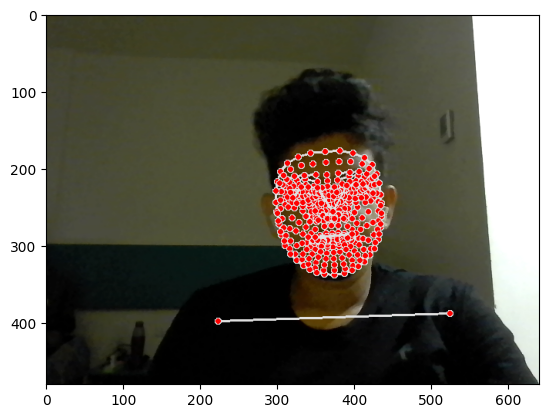

In [25]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)